In [1]:
import os 
import numpy as np
import torch
from utils1 import * 
import h5py
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
# os.environ["CUDA_VISIBLE_DEVICES"] = "1" 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from matplotlib.pyplot import savefig

In [2]:
train_file_path = '/home/rishabh.mondal/final_train.hdf5'
test_file_path = '/home/rishabh.mondal/final_val.hdf5'

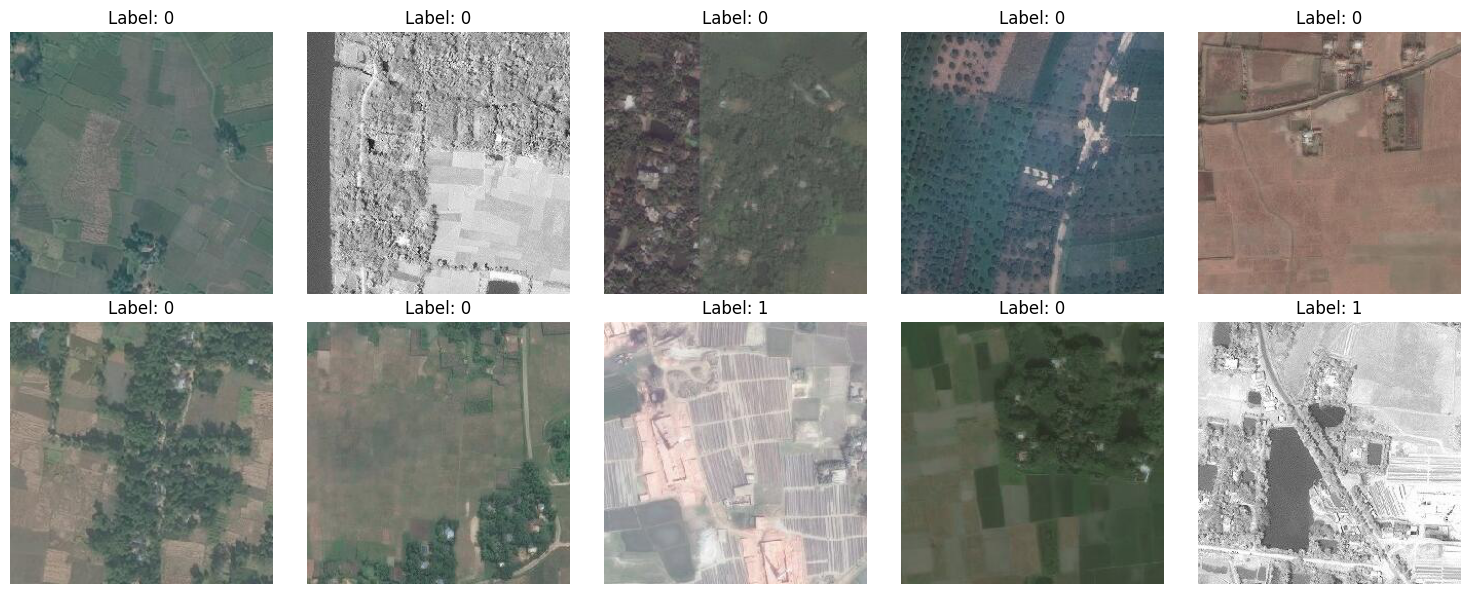

In [3]:
show_random_images_with_labels(test_file_path, num_images=10)

In [4]:
x_train, y_train = load_hdf5_data(train_file_path)
x_test, y_test = load_hdf5_data(test_file_path)

Images shape:  (2186, 256, 256, 3)
Labels shape:  (2186,)
Images shape:  (618, 256, 256, 3)
Labels shape:  (618,)


In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0, stratify=y_train)
class_0_train_count=np.sum(y_train==0)
class_1_train_count=np.sum(y_train==1)
class_0_val_count=np.sum(y_val==0)
class_1_val_count=np.sum(y_val==1)
class_0_test_count=np.sum(y_test==0)
class_1_test_count=np.sum(y_test==1)
print("Total train count: ", len(y_train))
print("Train class train 0 count: ", class_0_train_count)
print("Train class train 1 count: ", class_1_train_count)
print("Val class val 0 count: ", class_0_val_count)
print("Val class val 1 count: ", class_1_val_count)
print("Test class test 0 count: ", class_0_test_count)
print("Test class test 1 count: ", class_1_test_count)


Total train count:  1748
Train class train 0 count:  1533
Train class train 1 count:  215
Val class val 0 count:  384
Val class val 1 count:  54
Test class test 0 count:  545
Test class test 1 count:  73


In [6]:

resized_x_train = np.zeros((x_train.shape[0], 224, 224, 3), dtype=np.uint8)
print(resized_x_train.shape)
resized_x_test = np.zeros((x_test.shape[0], 224, 224, 3), dtype=np.uint8)
resized_x_val = np.zeros((x_val.shape[0], 224, 224, 3), dtype=np.uint8)
for i in range(x_train.shape[0]):
    img = Image.fromarray(x_train[i])
    img = img.resize((224, 224), Image.ANTIALIAS)
    resized_x_train[i] = np.array(img)

for i in range(x_test.shape[0]):
    img = Image.fromarray(x_test[i])
    img = img.resize((224, 224), Image.ANTIALIAS)
    resized_x_test[i] = np.array(img)

for i in range(x_val.shape[0]):
    img = Image.fromarray(x_val[i])
    img = img.resize((224, 224), Image.ANTIALIAS)
    resized_x_val[i] = np.array(img)    

(1748, 224, 224, 3)


/tmp/ipykernel_125088/1058328261.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((224, 224), Image.ANTIALIAS)


In [ ]:
print(resized_x_train.shape)

(1748, 224, 224, 3)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset


In [ ]:
train_dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float32).permute(0, 3, 1, 2), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(x_val, dtype=torch.float32).permute(0, 3, 1, 2), torch.tensor(y_val, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(x_test, dtype=torch.float32).permute(0, 3, 1, 2), torch.tensor(y_test, dtype=torch.float32))

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchsummary import summary




In [ ]:
def resnet50(larning_rate=0.0002,fine_tune=True,seed=4):
    torch.manual_seed(seed)    
    resnet = models.resnet50(pretrained=True)
    for param in resnet.parameters():
        param.requires_grad = False

    num_fitrs = resnet.fc.in_features
    resnet.fc = nn.Sequential(
        nn.Linear(num_fitrs, 2048),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(2048, 1),
        nn.Sigmoid()
    )    
    criterion=nn.BCELoss()
    optimizer = torch.optim.Adam(resnet.parameters(), lr=larning_rate)
    return resnet, criterion, optimizer

# def resnet101(larning_rate=0.0002,fine_tune=True,seed=42):
#     torch.manual_seed(seed)    
#     resnet = models.resnet101(pretrained=True)
#     for param in resnet.parameters():
#         param.requires_grad = False

#     num_fitrs = resnet.fc.in_features
#     resnet.fc = nn.Sequential(
#         nn.Linear(num_fitrs, 2048),
#         nn.ReLU(),
#         nn.Dropout(0.2),
#         nn.Linear(2048, 1),
#         nn.Sigmoid()
#     )    
#     criterion=nn.BCELoss()
#     optimizer = torch.optim.Adam(resnet.parameters(), lr=larning_rate)
#     return resnet, criterion, optimizer

# def dense_net(larning_rate=0.0002,fine_tune=True,seed=42):
#     torch.manual_seed(seed)    
#     densenet = models.densenet121(pretrained=True)
#     for param in densenet.parameters():
#         param.requires_grad = False

#     num_fitrs = densenet.classifier.in_features
#     densenet.classifier = nn.Sequential(
#         nn.Linear(num_fitrs, 1024),
#         nn.ReLU(),
#         nn.Dropout(0.2),
#         nn.Linear(1024, 1),
#         nn.Sigmoid()
#     )    
#     criterion=nn.BCELoss()
#     optimizer = torch.optim.Adam(densenet.parameters(), lr=larning_rate)
#     return densenet, criterion, optimizer

def VGG_16_transfer_model_author(learning_rate=0.00002, fine_tune=True, seed=4):
    # Set seeds for reproducibility
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    # Create an instance of the VGG16 model
    model = models.vgg16(pretrained=True)

    # Freeze the parameters of the model
    for param in model.parameters():
        param.requires_grad = False
    
    # Replace the classifier head for binary classification
    num_features = model.classifier[6].in_features
    model.classifier[6] = nn.Sequential(
        nn.Linear(num_features, 512),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(512, 1),
        nn.Sigmoid()
    )
    
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    return model, criterion, optimizer


In [ ]:
#summery of model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # seeds = [42, 44,48,56,88]
# # for seed in seeds:
# model, criterion, optimizer = resnet50(seed=42)
# model = model.to(device)
# summary(model, (3, 224, 224))
# del model, criterion, optimizer


# model, criterion, optimizer = resnet50()
# model = model.to(device)

# model1, criterion1, optimizer1 = resnet101()
# model1 = model1.to(device)

# model2, criterion2, optimizer2 = dense_net()
# model2.to(device)
# model3, criterion3, optimizer3 = vgg16()
# model3.to(device)


In [ ]:

model, criterion, optimizer = VGG_16_transfer_model_author(seed=4)
model = model.to(device)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    total_samples = 0
    total_correct = 0
    for images,labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        output = output.squeeze(dim=1)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        total_samples += labels.size(0)
        total_correct += (output.round() == labels).sum().item()

        epoch_loss = train_loss / len(train_loader)
        epoch_acc = (total_correct / total_samples)*100
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    model.eval()
    val_loss = 0.0
    val_total_samples = 0
    val_total_correct = 0
    with torch.no_grad():
        for images,labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            outputs = outputs.squeeze(dim=1)
            loss = criterion(outputs, labels.float())
            val_loss += loss.item()
            val_total_samples += labels.size(0)
            val_total_correct += (outputs.round() == labels).sum().item()
                
            val_loss = val_loss / len(val_loader)
            val_acc = (val_total_correct / val_total_samples)*100
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.4f}')
          
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

          

true_labels = []
predicted_labels = []
model.eval()  
test_loss = 0.0
test_total_samples = 0
test_total_correct = 0
with torch.no_grad():  
    for images,labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)
        output = output.squeeze(dim=1)

        loss = criterion(output, labels)
        test_loss += loss.item()

        predicted = (output.round() == 1.0)  
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())        

        test_total_samples += labels.size(0)
        test_total_correct += (output.round() == labels).sum().item()

    test_accuracy = (test_total_correct / test_total_samples) * 100



/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/100, Training Loss: 0.5962, Training Accuracy: 81.2929
Epoch 1/100, Validation Loss: 0.0553, Validation Accuracy: 87.6712


KeyboardInterrupt: 

In [ ]:
# print(train_losses)
# print(train_losses_per_seed)

[0.3873524016567639, 0.28557625891906874, 0.22757086317454064, 0.20136355103126594, 0.18113649051104272, 0.1796974278986454, 0.19741637472595489, 0.15905597739453828, 0.15370104355471476, 0.15101810837430613]
[[0.3745257875749043, 0.2735365575977734, 0.2195247621940715, 0.2003467535333974, 0.18184600145156896, 0.17305443861654826, 0.16312590853444167, 0.14712542667984962, 0.16115495136805943, 0.13673562024320876], [0.3873524016567639, 0.28557625891906874, 0.22757086317454064, 0.20136355103126594, 0.18113649051104272, 0.1796974278986454, 0.19741637472595489, 0.15905597739453828, 0.15370104355471476, 0.15101810837430613]]


(<module 'matplotlib.pyplot' from '/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/matplotlib/pyplot.py'>,
 None)

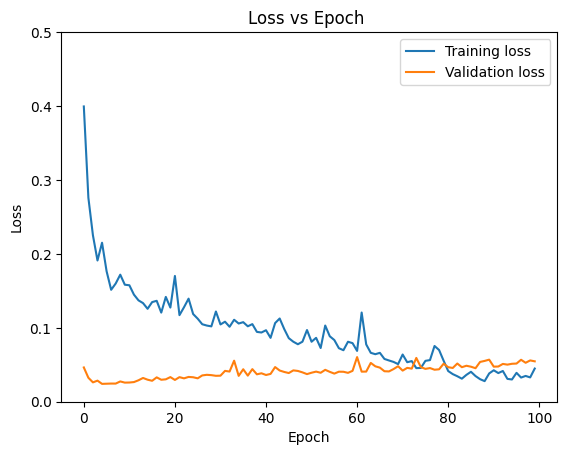

In [ ]:
#two plot in one figure
plt.ylim(0, .5)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch - seed 4')
plt,savefig('loss_vs_epoch_resnet50 - seed 4.png')

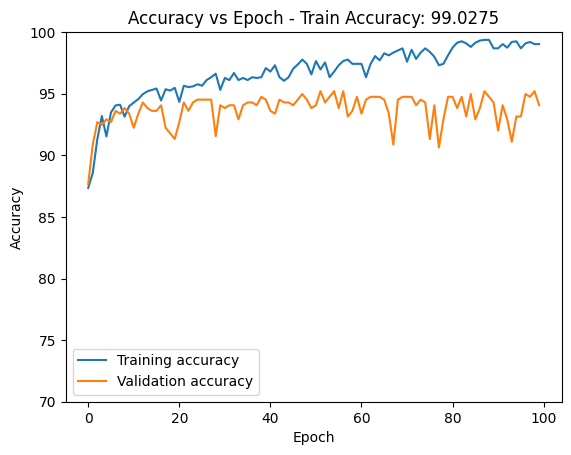

In [ ]:
#plot accuracy in same axis scale 0-100
plt.ylim(70, 100)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(val_accuracies, label='Validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# print final train accuracy in title of plot
plt.title('Accuracy vs Epoch seed - 4 - Train Accuracy: {:.4f}'.format(epoch_acc))
plt.savefig('accuracy_vs_epoch_resnet50 -seed 4.png')

Precision: 0.693 / Recall: 0.712 / F1-Score: 0.703 / Accuracy: 92.88


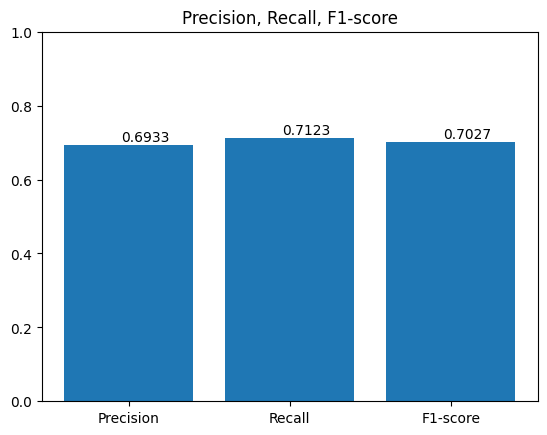

In [ ]:
#create the bar chart to show the precision, recall, f1-score
precision, recall, fscore, support = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(test_accuracy, 3)))
plt.ylim(0, 1)
plt.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, fscore])
for i, v in enumerate([precision, recall, fscore]):
    plt.text(i - 0.05, v + 0.01, str(round(v, 4)))
plt.title('Precision, Recall, F1-score - seed 4')
plt.savefig('vgg-16 - Precision, Recall, F1-score -seed 4.png');


In [ ]:
# plot classifcation report
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted_labels, target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96       545
     class 1       0.69      0.71      0.70        73

    accuracy                           0.93       618
   macro avg       0.83      0.84      0.83       618
weighted avg       0.93      0.93      0.93       618



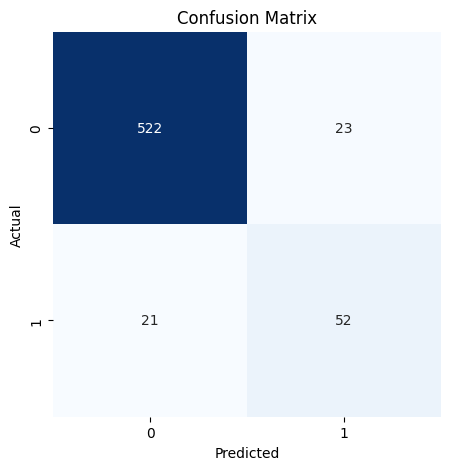

In [ ]:
#plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - seed 4')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('vgg-16 - Confusion Matrix seed - 4.png');


In [ ]:
# for key, var in locals().items():
#     if isinstance(var, torch.Tensor):
#        locals()[key] = var.cuda()
#     if isinstance(var, torch.nn.Module):
#        locals()[key] = var.cuda() 